# ccl demo 

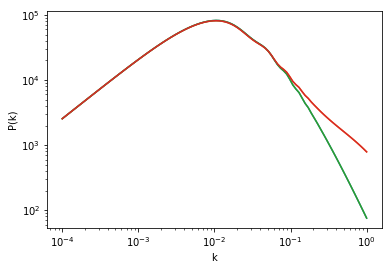

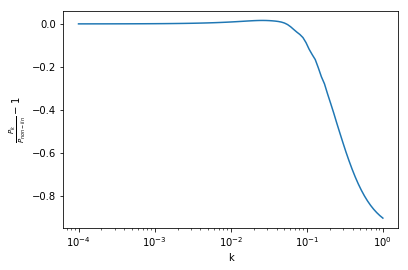

In [4]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
cosmo = ccl.Cosmology(Omega_c=0.24, Omega_b=0.04, h=0.7, n_s=0.926, sigma8=0.8111, transfer_function='boltzmann_class')
ccl.sigma8(cosmo)
k=np.logspace(-4, 0, 100)
a_arr=np.logspace(-3,0,100)
Pk = ccl.linear_matter_power(cosmo,k,1) #testing with a = 1
Pk_non_lin = ccl.nonlin_matter_power(cosmo, k, 1)
plt.loglog(k, Pk)
plt.loglog(k, Pk_non_lin)
plt.loglog(k, Pk)
plt.loglog(k, Pk_non_lin)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()
plt.semilogx(k, Pk/Pk_non_lin-1) #plot difference between linear and non linear power spectrum
plt.xlabel('k')
plt.ylabel(r'$\frac{P_k}{P_{non-lin}}-1$')
plt.show()
cosmo_lcdm = ccl.CosmologyVanillaLCDM(transfer_function='boltzmann_class')


# # ccl powerspectrum

(100, 100)
1.0


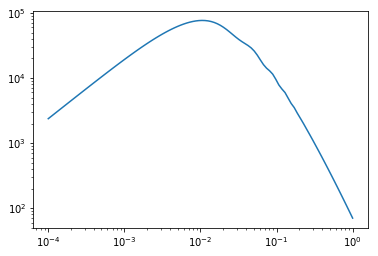

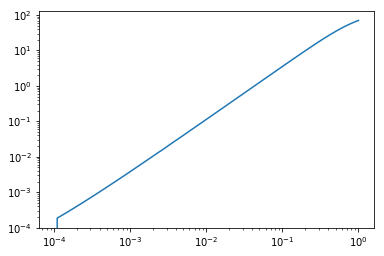

In [17]:

####################################
# ccl power spectrum for varying a 
####################################

Pk_a = np.ndarray(shape=(100))
for i in range(0,99):
    #making power spectrum array
    a = a_arr[i]
    pk=ccl.linear_matter_power(cosmo, k, a)
    Pk_a = np.vstack((Pk_a, pk))
print(Pk_a.shape)

#this doesnt work!! loops wrong..
# Pk_a = np.ndarray(shape=(100,100))
# for i in range(0,99):
#     for j in range(0, (len(k)-1):
#         #making power spectrum array
#         pk=ccl.linear_matter_power(cosmo, k[j], a_arr[i])
#         Pk_a[i,j]= pk

#Pk_a must be a 2D array of shape
#         `(n_a, n_k)`, where `n_a` and `n_k` are the lengths of
#         `'a'` and `'k'` respectively, containing the linear matter
#         power spectrum :math:`P(k,a)`.

print(a_arr[99])
plt.loglog(k, Pk_a[99,:])
plt.show()
plt.loglog(k, Pk_a[:,99])
# print(Pk_a[:,0])
plt.show()

# chi = ccl.comoving_radial_distance(cosmo_lcdm, a_arr)
# h_over_h0 = ccl.h_over_h0(cosmo_lcdm, a_arr)
# background = {'a': a_arr, 'chi': chi, 'h_over_h0': h_over_h0}
# pk_linear = {'a': a_arr, 'k':k ,'delta_matter:delta_matter':Pk_a}
# growth_rate=ccl.growth_rate(cosmo, a_arr)
# growth_factor= ccl.growth_factor(cosmo, a_arr)
# growth = {'a': a_arr, 'growth factor': growth_factor , 'growth_rate': growth_rate}
# ccl.CosmologyCalculator(background=background, pk_linear=pk_linear, Omega_c=0.24, Omega_b=0.04, h=0.7, n_s=0.926, sigma8=0.8111)
Pk_CCL = Pk_a


# class power spectrum

In [20]:
from classy import Class
import numpy as np


k_arr = np.logspace(-4, 0, 100)
a_arr=np.logspace(-3,0,100)
z_arr = 1/a_arr -1

cosmo_class = Class()
fixed_params =  {'gravity_model': 'propto_omega', 'Omega_smg': -1, 'Omega_Lambda': 0, 'Omega_fld': 0, 'expansion_model': 'wowa','output': 'mPk' }
cosmo_class.set(fixed_params)
cosmo_class.set({'output': 'mPk', 'z_max_pk': np.max(z_arr), 'P_k_max_1/Mpc': np.max(k_arr)})
w_a = -1.
alpha_B = 1.
expansion_smg = [0.5, -1., w_a]
parameters_smg = [1, alpha_B, 0, 0, 1]
varied_params = {'parameters_smg': str(parameters_smg).strip('[]'), 'expansion_smg' : str(expansion_smg).strip('[]')}
cosmo_class.set(varied_params)
cosmo_class.compute()

Pk_a = np.ndarray(shape=(100))
for i in range(0,99):
    #making power spectrum array
    a = a_arr[i]
    pk=ccl.linear_matter_power(cosmo, k_arr, a)
    Pk_a = np.vstack((Pk_a, pk))
print(Pk_a.shape)

# Pk_a = np.zeros((a_arr.size, k_arr.size))
# for i in range(0,99):
#     #making power spectrum array
#     a = a_arr[i]
#     for j in range(0, len(k_arr)-1):
#         k = k_arr[j]
#         pk = cosmo_class.pk(k, a)
#         Pk_a[i,j]= pk
# print(Pk_a.shape)

Pk_class = Pk_a

chi = ccl.comoving_radial_distance(cosmo_lcdm, a_arr)
h_over_h0 = ccl.h_over_h0(cosmo_lcdm, a_arr)
background = {'a': a_arr, 'chi': chi, 'h_over_h0': h_over_h0}
# pk_linear = {'a': arr, 'k':k ,'delta_matter':Pk}
pk_linear = {'a': a_arr, 'k':k_arr ,'delta_matter:delta_matter':Pk_a}
growth_rate=ccl.growth_rate(cosmo, a_arr)
growth_factor= ccl.growth_factor(cosmo, a_arr)
growth = {'a': a_arr, 'growth factor': growth_factor , 'growth_rate': growth_rate}
ccl.CosmologyCalculator(background=background, pk_linear=pk_linear, Omega_c=0.24, Omega_b=0.04, h=0.7, n_s=0.926, sigma8=0.8111)

(100, 100)


pyccl.Cosmology(Omega_c=0.24, Omega_b=0.04, h=0.7, n_s=0.926, sigma8=0.8111, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, c1_mg=1.0, c2_mg=1.0, lambda_mg=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='calculator', matter_power_spectrum='None', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')

ccl.CosmologyCalculator?
pk_linear = {'a': arr, 'k':k ,'delta_matter':Pk}

ccl.CosmologyCalculator(pk_linear)

# comparing ccl and Class Pk

In [ ]:

plt.loglog(k_arr, Pk_CCL[:,99], label= 'ccl')
plt.loglog(k_arr, Pk_class[:,99], label= 'class')
plt.legend()
plt.show()

plt.plot(Pk_CCL[:,99], Pk_class[:,99])
plt.xlabel('Pk ccl')
plt.ylabel('Pk class')
plt.show()

plt.plot(k_arr, (Pk_class[:,99]/Pk_CCL[:,99]-1))
plt.xlabel('k')
plt.ylabel('P(class)/P(ccl) -1')